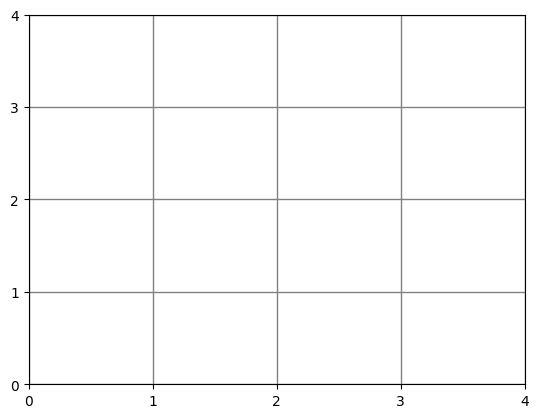

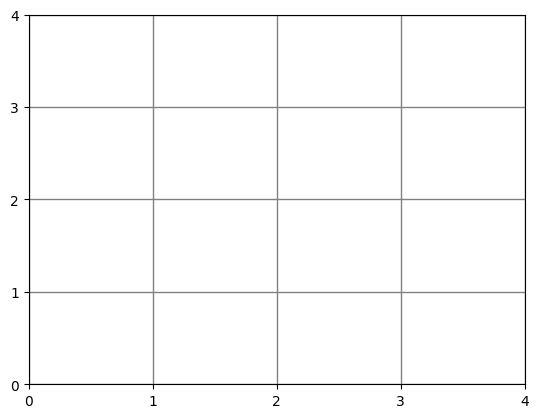

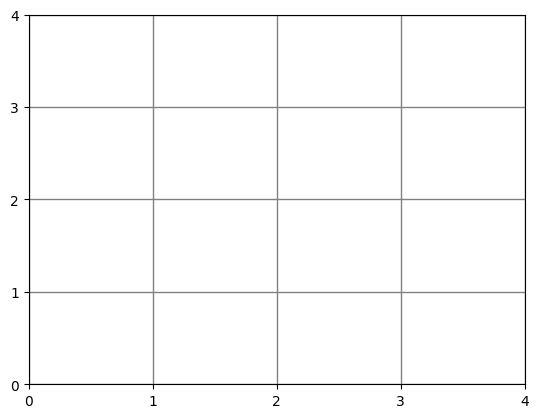

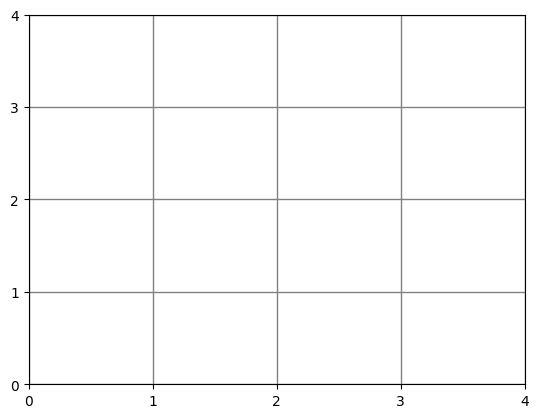

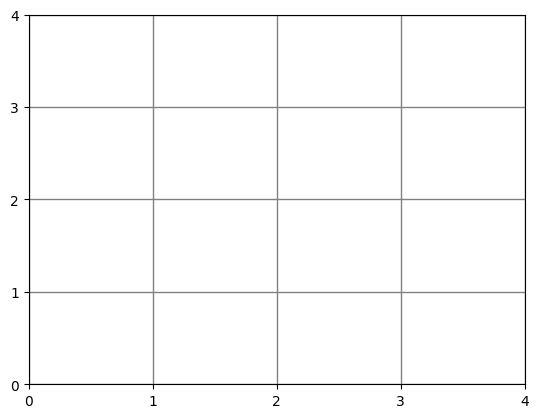

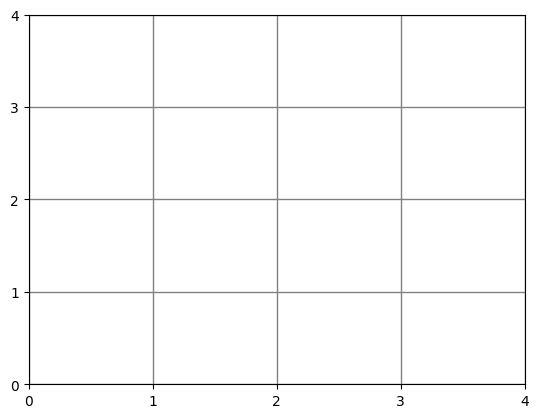

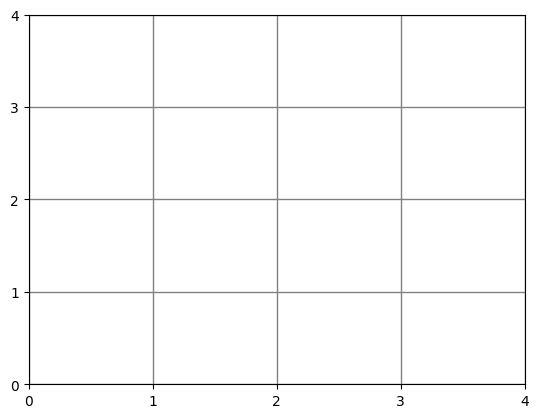

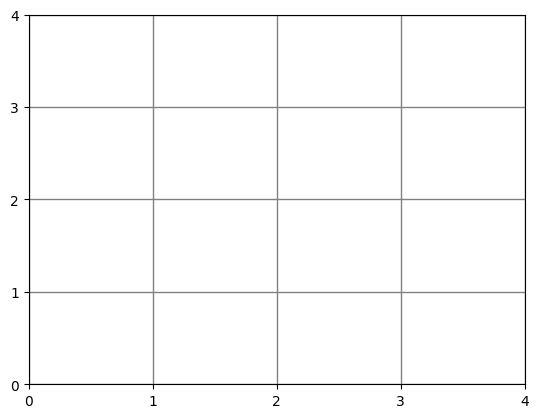

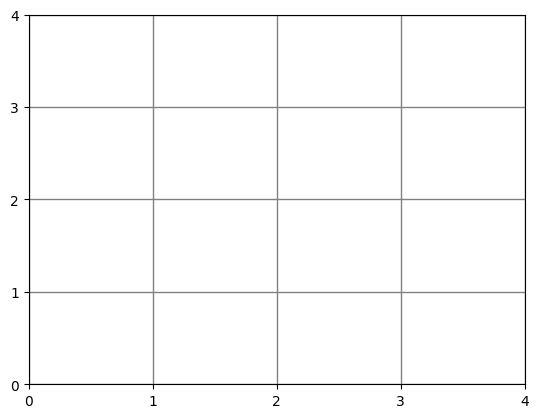

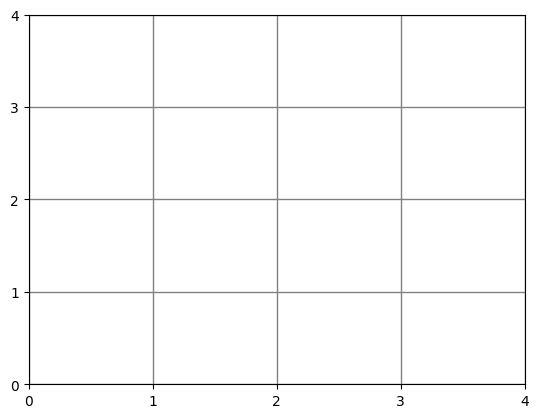

In [9]:
import numpy as np

class GridWorld:
    def __init__(self, size):
        self.size = size
        self.start_state = (0, 0)
        self.goal_state = (size-1, size-1)

    def reset(self):
        return self.start_state

    def step(self, state, action):
        transitions = {
            0: (-1, 0),  # up
            1: (1, 0),   # down
            2: (0, -1),  # left
            3: (0, 1)    # right
        }
        transition = transitions[action]
        next_state = (state[0] + transition[0], state[1] + transition[1])
        next_state = self._clip(next_state)
        reward = -1 if next_state != self.goal_state else 0
        return next_state, reward

    def observe(self, state):
        return state

    def _clip(self, state):
        return (max(0, min(state[0], self.size - 1)), max(0, min(state[1], self.size - 1)))

    def render(self, agent_pos):
        for i in range(self.size):
            for j in range(self.size):
                if (i, j) == agent_pos:
                    print("A", end=" ")  # Agent position
                elif (i, j) == self.goal_state:
                    print("G", end=" ")  # Goal position
                else:
                    print("-", end=" ")  # Empty cell
            print()

class QLearningPOMDP:
    def __init__(self, num_actions, grid_size, learning_rate=0.1, discount_factor=0.9):
        self.num_actions = num_actions
        self.grid_size = grid_size
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.Q = np.zeros((grid_size, grid_size, num_actions))

    def choose_action(self, state, belief_state):
        return np.argmax(self.Q[state[0], state[1]])

    def update_q_value(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.Q[next_state[0], next_state[1]])
        td_target = reward + self.discount_factor * self.Q[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.Q[state[0], state[1], action]
        self.Q[state[0], state[1], action] += self.learning_rate * td_error

def main():
    grid_size = 5
    num_actions = 4
    env = GridWorld(grid_size)
    agent = QLearningPOMDP(num_actions, grid_size)

    num_episodes = 10
    for episode in range(num_episodes):
        state = env.reset()
        belief_state = state
        done = False
        total_reward = 0

        print(f"Episode {episode + 1}")
        while not done:
            action = agent.choose_action(state, belief_state)
            next_state, reward = env.step(state, action)
            next_observation = env.observe(next_state)
            agent.update_q_value(state, action, next_state, reward)
            state = next_state
            belief_state = next_observation
            env.render(state)  # Print the grid world with agent and target positions
            print(f"Next state: {next_state}, Reward: {reward}, Total reward: {total_reward}")
            done = (state == env.goal_state)
        print("Episode finished")
        print("============================================")

if __name__ == "__main__":
    main()
